In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [3]:
model.compile(loss = keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
#mould image data
train_datagen = image.ImageDataGenerator(rescale = 1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('D:/dataset/Train',target_size = (224,224), batch_size = 32,class_mode='binary')
validation_generator = train_datagen.flow_from_directory('D:/dataset/Val',target_size = (224,224), batch_size = 32,class_mode='binary')

Found 220 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
hist_new = model.fit_generator(train_generator,steps_per_epoch=8,epochs = 10,validation_data=validation_generator,validation_steps=2)

Epoch 1/10
8/8 [==============================] - 86s 11s/step - loss: 1.0071 - accuracy: 0.5000 - val_loss: 0.6797 - val_accuracy: 0.8833
Epoch 2/10
8/8 [==============================] - 80s 10s/step - loss: 0.6258 - accuracy: 0.6865 - val_loss: 0.5358 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 83s 10s/step - loss: 0.4188 - accuracy: 0.7863 - val_loss: 0.3111 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 82s 10s/step - loss: 0.2940 - accuracy: 0.8849 - val_loss: 0.2849 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 82s 10s/step - loss: 0.2129 - accuracy: 0.9206 - val_loss: 0.1410 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 74s 9s/step - loss: 0.1611 - accuracy: 0.9603 - val_loss: 0.0797 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 76s 9s/step - loss: 0.1870 - accuracy: 0.9246 - val_loss: 0.1185 - val_accuracy: 0.9500
Epoch 8/10
8/8 [=============

In [8]:
summary = hist_new.history
print(summary)

{'val_loss': [0.6797249913215637, 0.5358483791351318, 0.31106457114219666, 0.2849244177341461, 0.14097648859024048, 0.07973798364400864, 0.11845825612545013, 0.09051041305065155, 0.08963587135076523, 0.022459179162979126], 'val_accuracy': [0.8833333253860474, 0.9333333373069763, 0.9333333373069763, 0.949999988079071, 0.9833333492279053, 0.949999988079071, 0.949999988079071, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053], 'loss': [0.9917603106725783, 0.6250943759131053, 0.4186282604932785, 0.29447044692342245, 0.2133736288736737, 0.16210000358876728, 0.1862753816540279, 0.14265080553198617, 0.11148420141802894, 0.08123906039529377], 'accuracy': [0.5, 0.68650794, 0.78629035, 0.88492066, 0.9206349, 0.96031743, 0.92460316, 0.9285714, 0.95238096, 0.97619045]}


In [9]:
model.save('model_covid.h5')

In [2]:
model=keras.models.load_model('model_covid.h5')

In [11]:
model.evaluate_generator(train_generator)

[0.021894307807087898, 0.9727272987365723]

In [12]:
model.evaluate_generator(validation_generator)

[0.12018036097288132, 0.949999988079071]

In [13]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [30]:
y_actual, y_test = [], []

In [31]:
import os 
import numpy as np
for i in os.listdir('D:/dataset/Val/Normal'):
    img = image.load_img('D:/dataset/Val/Normal/'+ i, target_size=(224,224))
    img = np.expand_dims(img, axis=0)
    pred = model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [32]:
import os 
for i in os.listdir('D:/dataset/Val/Covid'):
    img = image.load_img('D:/dataset/Val/Covid/'+ i, target_size=(224,224))
    img = np.expand_dims(img, axis=0)
    pred = model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [33]:
#len(y_test)
len(y_actual)

60

In [34]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)

<AxesSubplot:>

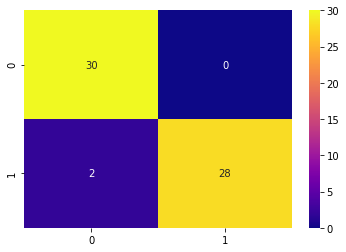

In [36]:
sns.heatmap(cm, cmap='plasma',annot=True)

In [37]:
#from the heatmap we can say that the false negative is zero(i.e. if the person is normal but still we say he has covid)
train_generator.class_indices


{'Covid': 0, 'Normal': 1}

array([0])

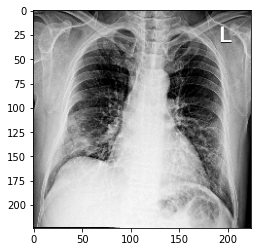

In [3]:
img = image.load_img('covid-19-pneumonia-30-PA.jpg', target_size=(224,224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pred = model.predict_classes(img)
pred[0]


<PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6FDBDB00>


1

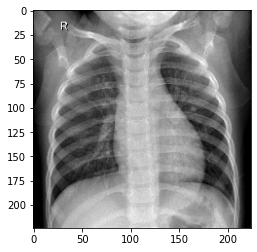

In [9]:
img = image.load_img('NORMAL2-IM-1300-0001.jpeg', target_size=(224,224))
print(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pred = model.predict_classes(img)
prob = pred[0]
prob[0]